In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')
from src import data
from scipy.stats import spearmanr, rankdata, pearsonr

from netneurotools import metrics # zjistit, proč tohle nefunguje přes pip 
# (mám to stažené lokálně z Githubu a to pak funguje)

# https://neuraldatascience.io/7-eeg/mne_data.html
%matplotlib widget

PLOT=True

!date -I

2024-02-01


In [2]:
# load data F-TRACT
parcellation = "DKT" # "Destrieux" # 

response_probability = np.loadtxt(f'../data/external/F-TRACT/{parcellation}/probability.txt.gz')
response_amplitude = np.loadtxt(f'../data/external/F-TRACT/{parcellation}/amplitude__median.txt.gz')

dkt_roi = ['ctx-lh-bankssts','ctx-lh-caudalanteriorcingulate','ctx-lh-caudalmiddlefrontal','ctx-lh-corpuscallosum','ctx-lh-cuneus','ctx-lh-entorhinal','ctx-lh-fusiform','ctx-lh-inferiorparietal','ctx-lh-inferiortemporal','ctx-lh-isthmuscingulate','ctx-lh-lateraloccipital','ctx-lh-lateralorbitofrontal','ctx-lh-lingual','ctx-lh-medialorbitofrontal','ctx-lh-middletemporal','ctx-lh-parahippocampal','ctx-lh-paracentral','ctx-lh-parsopercularis','ctx-lh-parsorbitalis','ctx-lh-parstriangularis','ctx-lh-pericalcarine','ctx-lh-postcentral','ctx-lh-posteriorcingulate','ctx-lh-precentral','ctx-lh-precuneus','ctx-lh-rostralanteriorcingulate','ctx-lh-rostralmiddlefrontal','ctx-lh-superiorfrontal','ctx-lh-superiorparietal','ctx-lh-superiortemporal','ctx-lh-supramarginal','ctx-lh-frontalpole','ctx-lh-temporalpole','ctx-lh-transversetemporal','ctx-lh-insula','ctx-rh-bankssts','ctx-rh-caudalanteriorcingulate','ctx-rh-caudalmiddlefrontal','ctx-rh-corpuscallosum','ctx-rh-cuneus','ctx-rh-entorhinal','ctx-rh-fusiform','ctx-rh-inferiorparietal','ctx-rh-inferiortemporal','ctx-rh-isthmuscingulate','ctx-rh-lateraloccipital','ctx-rh-lateralorbitofrontal','ctx-rh-lingual','ctx-rh-medialorbitofrontal','ctx-rh-middletemporal','ctx-rh-parahippocampal','ctx-rh-paracentral','ctx-rh-parsopercularis','ctx-rh-parsorbitalis','ctx-rh-parstriangularis','ctx-rh-pericalcarine','ctx-rh-postcentral','ctx-rh-posteriorcingulate','ctx-rh-precentral','ctx-rh-precuneus','ctx-rh-rostralanteriorcingulate','ctx-rh-rostralmiddlefrontal','ctx-rh-superiorfrontal','ctx-rh-superiorparietal','ctx-rh-superiortemporal','ctx-rh-supramarginal','ctx-rh-frontalpole','ctx-rh-temporalpole','ctx-rh-transversetemporal','ctx-rh-insula']

with open(f'../data/external/F-TRACT/{parcellation}/{parcellation}.txt', 'r') as f:
    parcell_ids =  [i for i,line in enumerate(f) if line[:-1] in dkt_roi]

# select ROI
response_probability = response_probability[np.ix_(parcell_ids, parcell_ids)]
response_amplitude  = response_amplitude[np.ix_(parcell_ids, parcell_ids)]

print(response_probability.shape)

(70, 70)


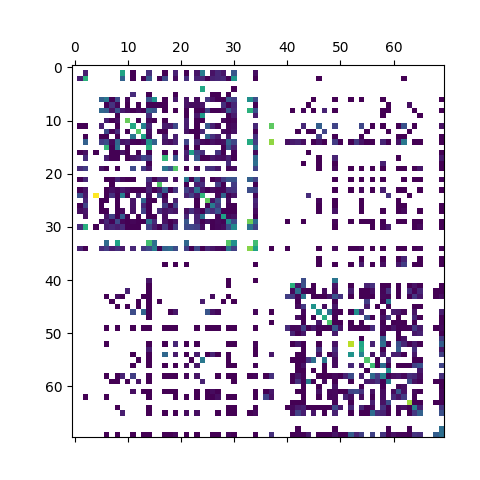

In [3]:
plt.matshow(response_probability)

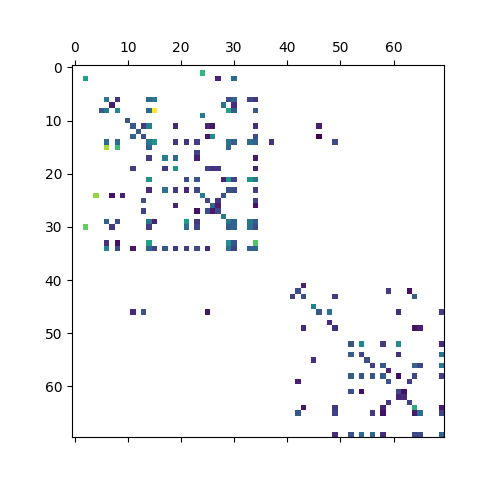

In [4]:
plt.matshow(response_amplitude)


(array([ 2., 13., 18., 18., 19., 20., 21., 18., 18., 16., 12., 11.,  8.,
         6.,  1.,  7.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
         0.,  0.,  0.,  1.]),
 array([ 5.867     ,  6.21673333,  6.56646667,  6.9162    ,  7.26593333,
         7.61566667,  7.9654    ,  8.31513333,  8.66486667,  9.0146    ,
         9.36433333,  9.71406667, 10.0638    , 10.41353333, 10.76326667,
        11.113     , 11.46273333, 11.81246667, 12.1622    , 12.51193333,
        12.86166667, 13.2114    , 13.56113333, 13.91086667, 14.2606    ,
        14.61033333, 14.96006667, 15.3098    , 15.65953333, 16.00926667,
        16.359     ]),
 <BarContainer object of 30 artists>)

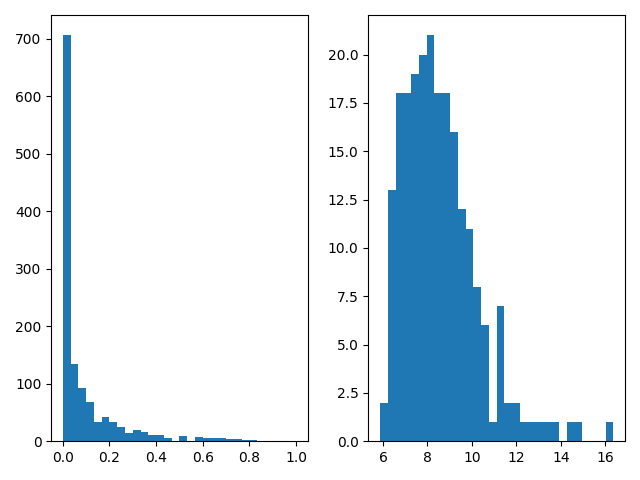

In [5]:
n_bins = 30

# Generate two normal distributions
fig, axs = plt.subplots(1, 2, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(response_probability.flatten(), bins=n_bins)
axs[1].hist(response_amplitude.flatten(), bins=n_bins)

In [6]:
with np.printoptions(threshold=np.inf):
    print(response_probability)
    print(response_amplitude)

[[  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]
 [  nan   nan 0.083   nan   nan   nan   nan   nan   nan 0.583   nan 0.
    nan   nan 0.133   nan   nan 0.      nan 0.091   nan 0.      nan 0.057
  0.423   nan 0.05  0.11  0.062   nan 0.267   nan   nan   nan 0.037   nan
    nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan   nan   nan   nan   nan   nan   nan   nan   nan]
 [  nan 0.083 0.639   nan   nan   nan   nan   nan   nan 0.316   nan 0.
    nan 0.    0.273   nan 0.    0.222   nan 0.034   nan 0.13    na

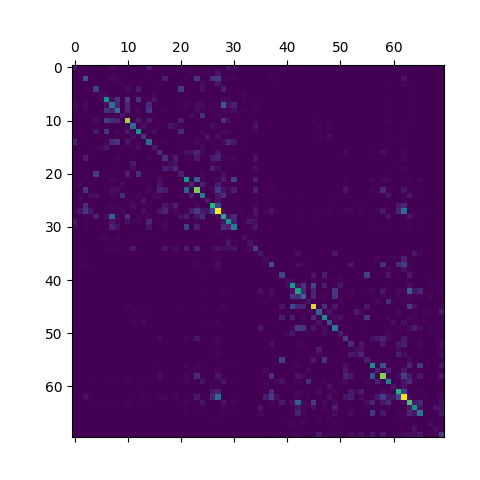

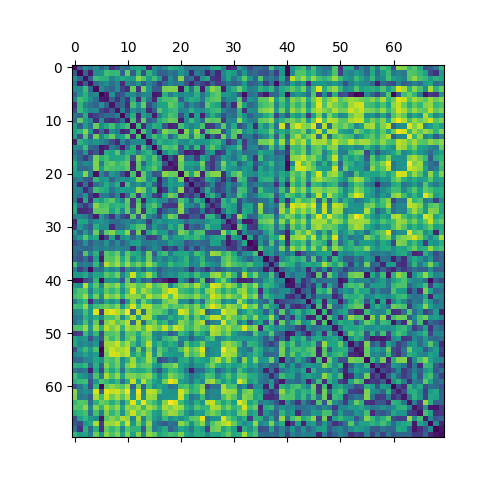

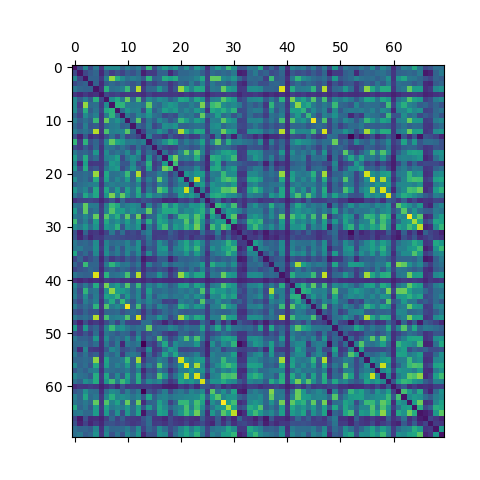

In [7]:
rootdir = "../data/external/hcp/DKT/"
scdir = "1StructuralConnectivity/"
fcdir = "2FunctionalConnectivity/"

W, L = np.zeros((70,70)), np.zeros((70,70))

for i in range(200):
    counts_file = rootdir+scdir+f"{i:03d}/Counts.csv"
    with open(counts_file,"r") as cf:
        c = np.genfromtxt(cf,delimiter=" ")
    W += c/200
    
    lenghts_file = rootdir+scdir+f"{i:03d}/Lengths.csv"
    with open(lenghts_file,"r") as lf:
        l = np.genfromtxt(lf,delimiter=" ")
    L += l/200

FC = np.zeros((70,70))

for i in range(200):
    FC_file = rootdir+fcdir+f"{i:03d}/EmpCorrFC_concatenated.csv"
    with open(FC_file,"r") as file:
        fc = np.genfromtxt(file)
    FC += fc/200

if PLOT:
    plt.matshow(W)
    plt.matshow(L)
    plt.matshow(FC)

(array([  6.,  76.,  62., 184., 370., 366., 292., 228., 300., 388., 370.,
        342., 356., 296., 256., 196., 196., 164., 108.,  58.,  74.,  64.,
         58.,  28.,   8.,  14.,  18.,   8.,  10.,   4.]),
 array([-0.04949268, -0.01791739,  0.0136579 ,  0.04523319,  0.07680848,
         0.10838378,  0.13995907,  0.17153436,  0.20310965,  0.23468494,
         0.26626024,  0.29783553,  0.32941082,  0.36098611,  0.3925614 ,
         0.4241367 ,  0.45571199,  0.48728728,  0.51886257,  0.55043786,
         0.58201315,  0.61358845,  0.64516374,  0.67673903,  0.70831432,
         0.73988961,  0.77146491,  0.8030402 ,  0.83461549,  0.86619078,
         0.89776607]),
 <BarContainer object of 30 artists>)

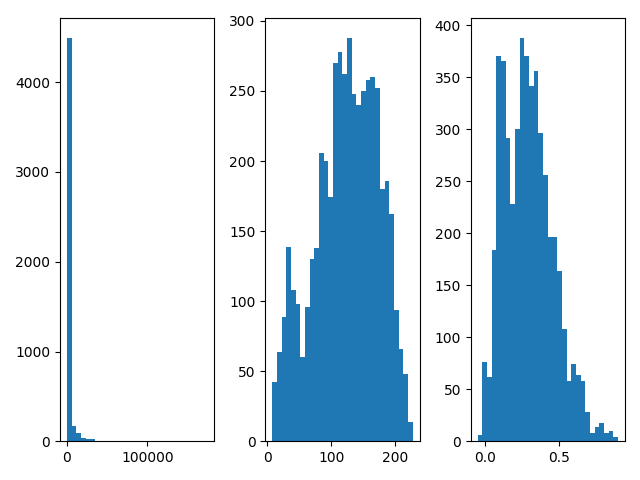

In [8]:
n_bins = 30

# Generate two normal distributions
fig, axs = plt.subplots(1, 3, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(W.flatten(), bins=n_bins)
axs[1].hist(L.flatten(), bins=n_bins)
axs[2].hist(FC.flatten(), bins=n_bins)


In [9]:
# shortcut for correlation of X with response probability and amplitude 
rpf = response_probability.flatten()
raf = response_amplitude.flatten()

def coor_with_response(X):
    r_probability = spearmanr(X.flatten(),rpf,nan_policy='omit')
    r_amplitude = spearmanr(X.flatten(),raf,nan_policy='omit')

    print(f"Correlation with response probabilty: {r_probability.statistic:.3f} (p={r_probability.pvalue:.3f})")
    print(f"Correlation with response amplitude: {r_amplitude.statistic:.3f} (p={r_amplitude.pvalue:.3f})")

    if PLOT:
        coor_plot(X)

def coor_plot(X):
    rpf_ranks = rankdata(rpf[~np.isnan(rpf)], method='ordinal')
    X_ranks_rpf = rankdata(X.flatten()[~np.isnan(rpf)], method='ordinal')
    df_rpf = pd.DataFrame({'x':X_ranks_rpf,'y':rpf_ranks})
    sns.lmplot(data=df_rpf,x='x',y='y');

    raf_ranks = rankdata(raf[~np.isnan(raf)], method='ordinal')
    X_ranks_raf = rankdata(X.flatten()[~np.isnan(raf)], method='ordinal')
    df_raf = pd.DataFrame({'x':X_ranks_raf,'y':raf_ranks})
    sns.lmplot(data=df_raf,x='x',y='y');

Correlation with response probabilty: 0.461 (p=0.000)
Correlation with response amplitude: -0.004 (p=0.953)


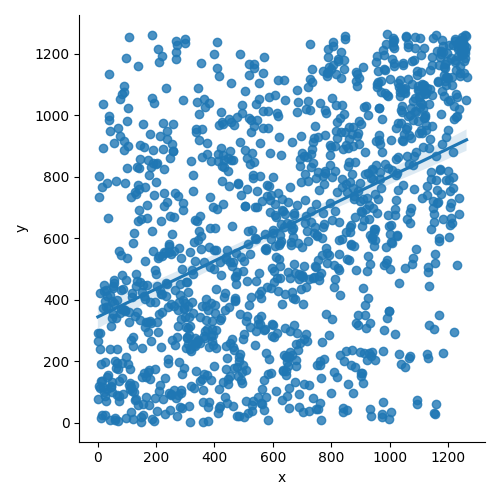

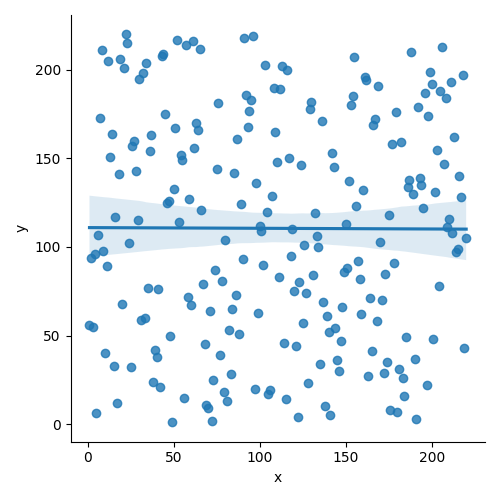

In [10]:
coor_with_response(W) 
#coor_plot(W)

Correlation with response probabilty: -0.574 (p=0.000)
Correlation with response amplitude: -0.116 (p=0.085)


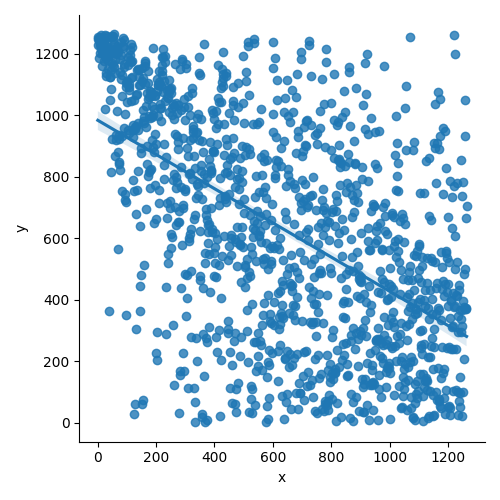

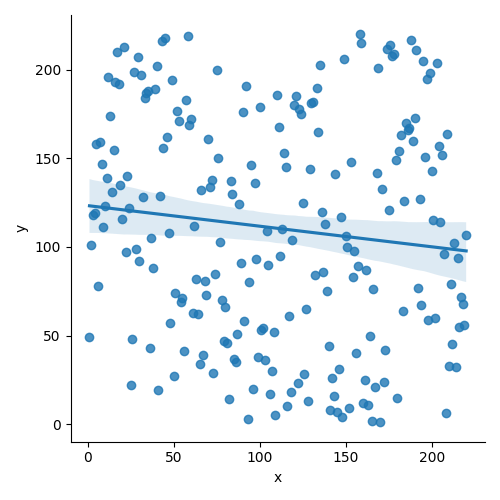

In [11]:
coor_with_response(L) 
#coor_plot(L)

Correlation with response probabilty: 0.053 (p=0.060)
Correlation with response amplitude: -0.160 (p=0.017)


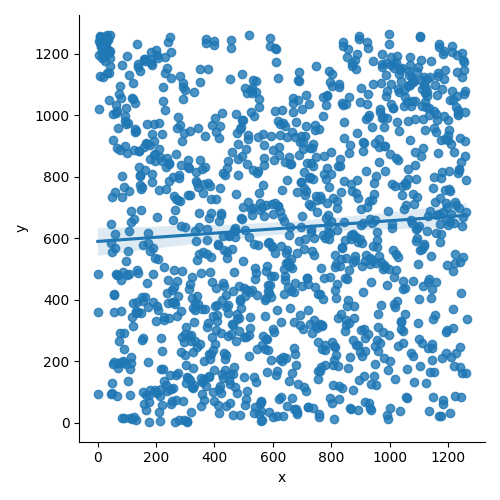

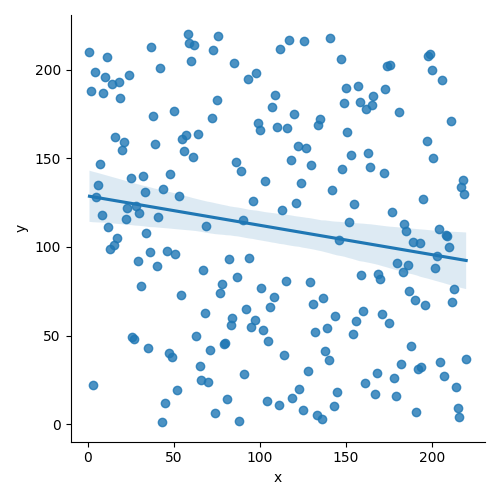

In [12]:
coor_with_response(FC)

/tmp/ipykernel_93633/2515200096.py:3: RuntimeWarning: divide by zero encountered in divide
  shorest_path_eff = np.divide(1,shorest_paths)


Correlation with response probabilty: 0.452 (p=0.000)
Correlation with response amplitude: -0.003 (p=0.968)


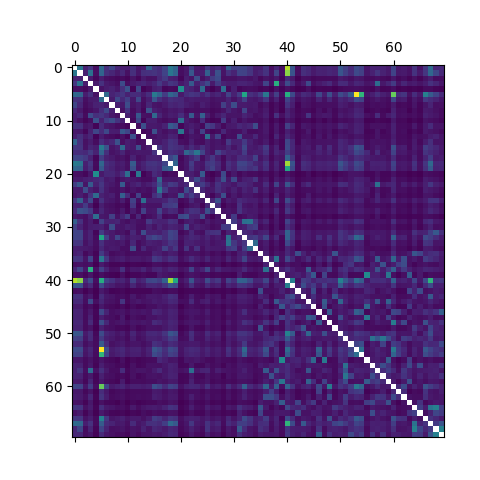

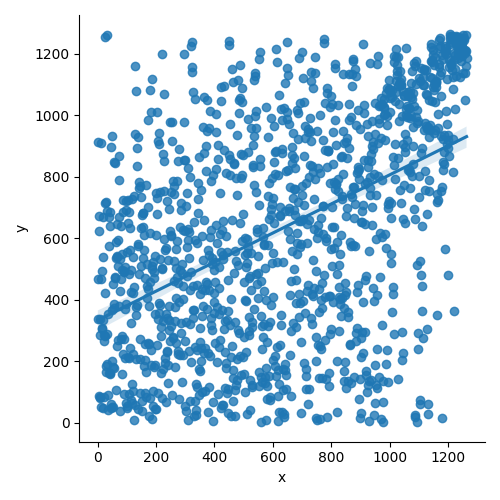

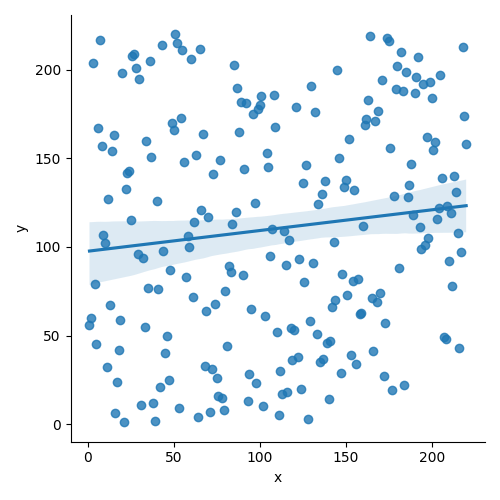

In [13]:
# shortest path efficiency
shorest_paths,_ = metrics.distance_wei_floyd(L)
shorest_path_eff = np.divide(1,shorest_paths)

if PLOT:
    plt.matshow(shorest_path_eff)

coor_with_response(shorest_path_eff)

Correlation with response probabilty: 0.329 (p=0.000)
Correlation with response amplitude: -0.186 (p=0.006)


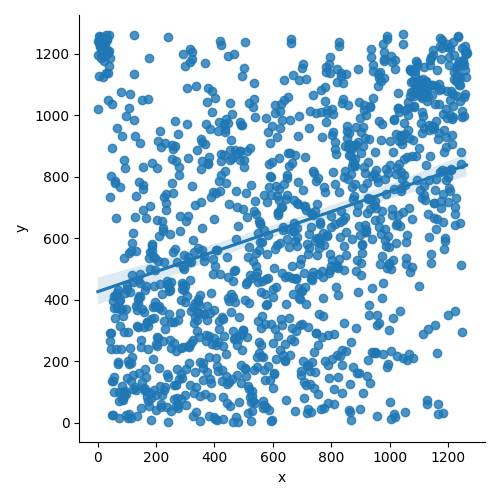

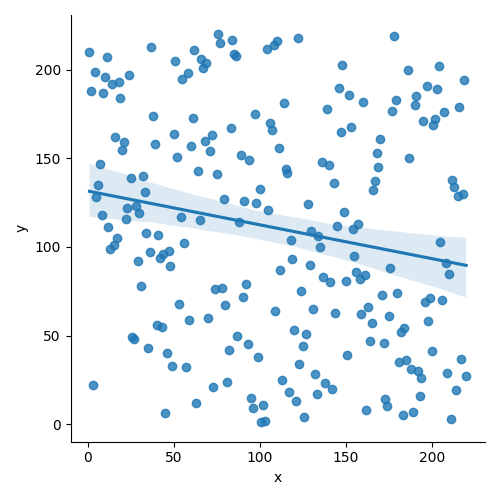

In [14]:
com = metrics.communicability_wei(W)

coor_with_response(com)

Correlation with response probabilty: -0.406 (p=0.000)
Correlation with response amplitude: 0.065 (p=0.385)


/home/katterrina/fi_muni/0_diplomka/__venv__/lib/python3.10/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


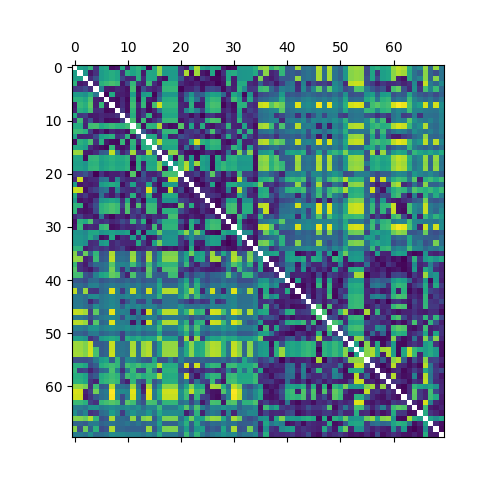

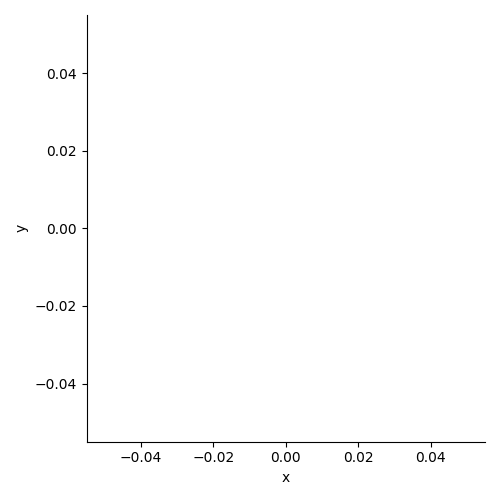

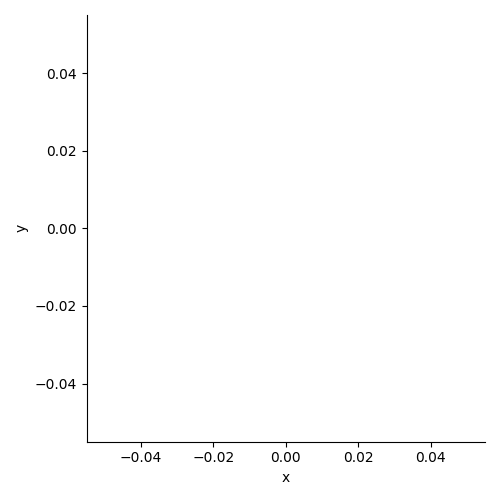

In [15]:
SI = metrics.search_information(W,L)

if PLOT:
    plt.matshow(SI)

coor_with_response(SI)

/home/katterrina/fi_muni/0_diplomka/__venv__/lib/python3.10/site-packages/netneurotools/metrics.py:780: RuntimeWarning: divide by zero encountered in divide
  E_diff = np.divide(1, mfpt)


Correlation with response probabilty: -0.022 (p=0.439)
Correlation with response amplitude: -0.242 (p=0.000)


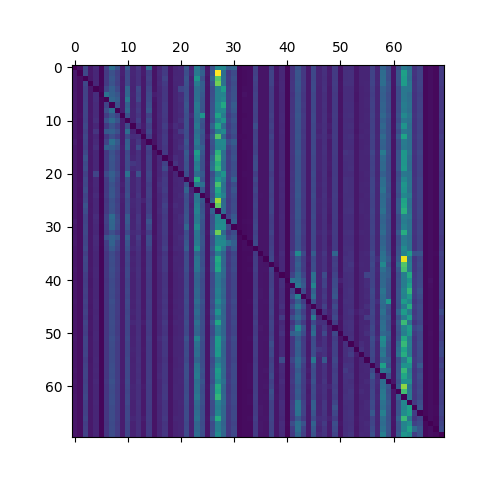

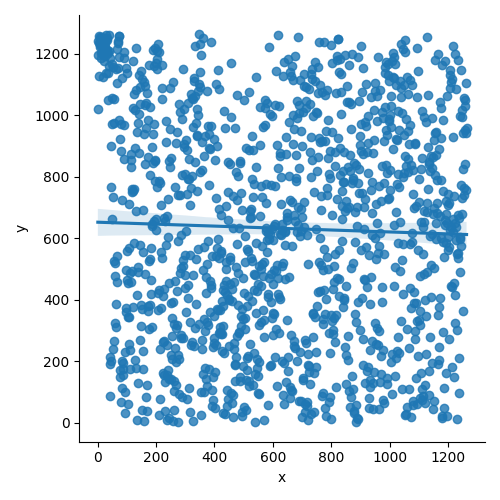

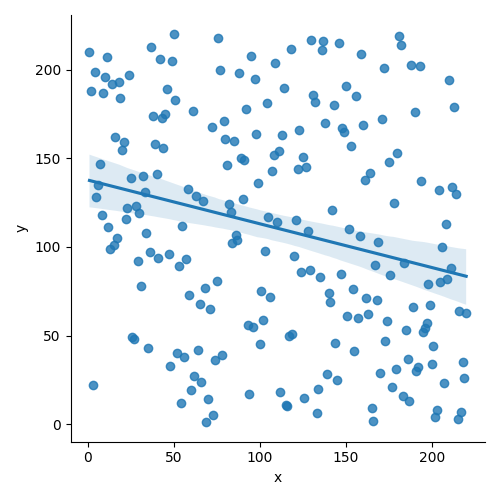

In [16]:
# https://netneurolab.github.io/netneurotools/_modules/netneurotools/metrics.html#diffusion_efficiency
diffusion = metrics.diffusion_efficiency(W)[1] # tahle funkce určitě má dostat SC, a ne délky L

if PLOT:
    plt.matshow(diffusion)

coor_with_response(diffusion)

/tmp/ipykernel_93633/2427672740.py:3: RuntimeWarning: divide by zero encountered in divide
  nav_eff = np.divide(1,nav_paths)


Correlation with response probabilty: 0.455 (p=0.000)
Correlation with response amplitude: -0.008 (p=0.918)


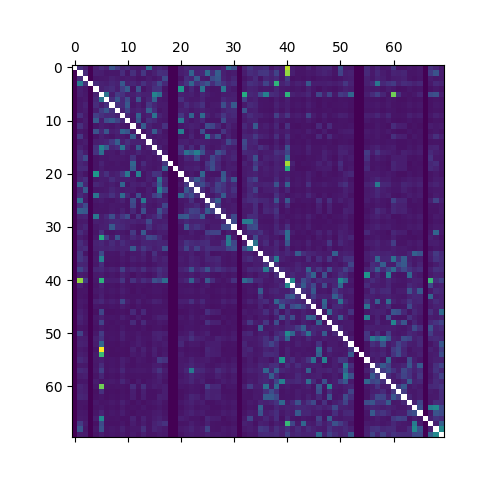

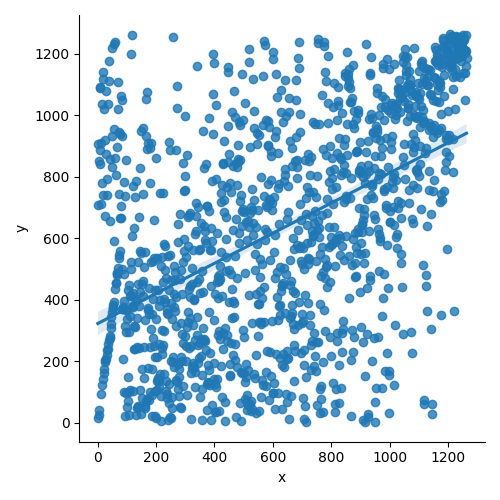

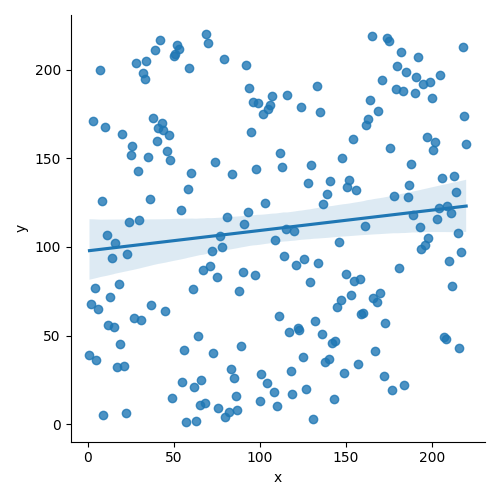

In [17]:
# tady té funkci možná dávám špatný vstup?
_,_,nav_paths,_,_ = metrics.navigation_wu(L, W)
nav_eff = np.divide(1,nav_paths)

if PLOT:
    plt.matshow(nav_eff)

coor_with_response(nav_eff)